In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np
import matrix_dev
import matplotlib.pyplot as plt
import _pickle
import gensim
import gensim.corpora as corpora
import os
from pprint import pprint
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from lda_implementation import lda_model

In [3]:
lda = lda_model()

/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dt

In [4]:
lda.load_data('raw_docs', 'dev')

loading pickles


/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [5]:
#lda.lda_mallet_model()
best_model, coherence_values = lda.best_model_search()


Num_topics =  30  corresponding coherence value:  0.464285973683647
Num_topics =  80  corresponding coherence value:  0.5386608241322357
Num_topics =  130  corresponding coherence value:  0.5938606702302477
Num_topics =  180  corresponding coherence value:  0.6230366307161699
Num_topics =  230  corresponding coherence value:  0.6561172918401308
Num_topics =  280  corresponding coherence value:  0.6705458510369121
Num_topics =  330  corresponding coherence value:  0.6773575279453754
Num_topics =  380  corresponding coherence value:  0.6890472055507807
Num_topics =  430  corresponding coherence value:  0.6923725609599596
Num_topics =  480  corresponding coherence value:  0.6954030757557658
representative docs
topic distribution


In [6]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, lda.corpus, lda.id2word)

In [7]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics             x         y
topic                                                   
437    0.527177        1       1 -1.299232e-04  0.000021
39     0.446588        1       2  4.756124e-05  0.000034
226    0.403500        1       3  7.383882e-05 -0.000063
62     0.357214        1       4 -6.763075e-05 -0.000091
315    0.337976        1       5 -3.346342e-07  0.000045
105    0.330042        1       6  8.954869e-05 -0.000034
61     0.321376        1       7  8.934973e-06  0.000218
178    0.312533        1       8 -9.531225e-05 -0.000047
133    0.306372        1       9 -3.127570e-05  0.000075
228    0.302528        1      10  2.788569e-06  0.000073
431    0.300156        1      11 -1.366785e-05 -0.000081
176    0.297244        1      12 -4.485184e-05  0.000073
155    0.294856        1      13  1.106906e-04 -0.000145
353    0.290908        1      14 -1.534999e-04  0.000020
22     0.286203        1      15  1.730632e-04  0.000048
100    0.281888        1      16  2.635373e-04 -0.000058
292    0.276471        1      17  3.579615e-05  0.000113
209    0.276273        1      18 -1.722729e-04  0.000133
350    0.274264        1      19 -1.729707e-04 -0.000045
451    0.273685        1      20  8.201289e-05 -0.000179
363    0.271919        1      21  2.051644e-04 -0.000089
79     0.260985        1      22 -8.175119e-05 -0.000168
146    0.260830        1      23 -1.123408e-05  0.000011
255    0.258493        1      24  1.123062e-04  0.000100
297    0.258402        1      25 -1.035389e-04  0.000111
106    0.258362        1      26 -1.713556e-05  0.000088
347    0.256708        1      27 -3.983643e-05  0.000130
174    0.254822        1      28  2.977585e-05  0.000045
166    0.247938        1      29 -6.714007e-05  0.000141
9      0.247213        1      30 -8.966670e-05 -0.000049
...         ...      ...     ...           ...       ...
102    0.192503        1     451 -1.190604e-05 -0.000005
58     0.192496        1     452 -1.187464e-04 -0.000024
468    0.192495        1     453  7.871537e-05 -0.000044
440    0.192460        1     454 -1.023489e-04 -0.000007
261    0.192413        1     455  2.356412e-04 -0.000069
422    0.192344        1     456  6.985758e-06  0.000160
23     0.192237        1     457  3.731816e-05 -0.000072
398    0.192084        1     458 -1.273442e-04 -0.000064
334    0.191873        1     459 -4.086015e-05 -0.000129
88     0.191827        1     460  1.373675e-04 -0.000053
119    0.191824        1     461 -4.081036e-05  0.000097
121    0.191797        1     462  1.310345e-04 -0.000095
137    0.191771        1     463 -5.643912e-05 -0.000123
77     0.191665        1     464  2.022040e-05 -0.000164
175    0.191427        1     465 -6.936094e-05  0.000040
153    0.191424        1     466 -2.168008e-05 -0.000013
276    0.191378        1     467  5.161085e-05 -0.000022
309    0.191311        1     468 -8.588879e-05  0.000118
278    0.191239        1     469  1.769396e-05  0.000051
401    0.191076        1     470  9.156492e-05 -0.000108
248    0.191026        1     471  7.426639e-05  0.000102
123    0.190945        1     472 -2.462216e-04  0.000005
419    0.190938        1     473 -9.151514e-05  0.000065
406    0.190765        1     474 -1.104736e-04 -0.000086
220    0.190716        1     475 -1.387576e-04 -0.000005
201    0.190605        1     476 -8.347009e-05  0.000083
462    0.190392        1     477  8.268791e-05  0.000103
55     0.190263        1     478  2.234568e-05  0.000056
272    0.189215        1     479 -1.375968e-04  0.000204
170    0.187638        1     480  2.434244e-05  0.000015

[480 rows x 5 columns], topic_info=       Category      Freq                Term     Total  loglift  logprob
term                                                                     
12585   Default  3.000000              correa  3.000000  30.0000  30.0000
12834   Default  3.000000             llegado  3.000000  29.0000  29.0000
14147   Default  3.000000            liiiinda 

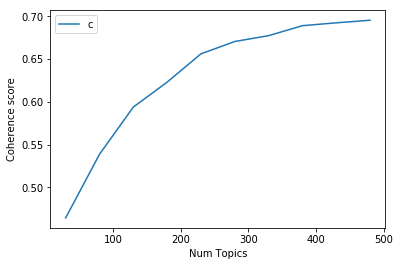

In [8]:
start=30
limit=500
step=50
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
name = 'best_model'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "wb") as f:
	_pickle.dump(best_model, f)

In [11]:

name = 'best_model'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "rb") as f:
	test_model = _pickle.load(f)

In [ ]:
Dominant topic per tweet(tweet)

In [16]:
dominant_topic = lda.domininant_topic(best_model)
dominant_topic

Dominant_Topic  Perc_Contribution  \
0              146.0             0.0713   
1              317.0             0.0160   
2              258.0             0.0084   
3              226.0             0.0394   
4              192.0             0.0114   
5              122.0             0.0098   
6              339.0             0.0104   
7               79.0             0.0168   
8              462.0             0.0142   
9              382.0             0.0084   
10             353.0             0.0104   
11             437.0             0.3666   
12             437.0             0.0586   
13             226.0             0.0152   
14             265.0             0.0102   
15              62.0             0.0100   
16              62.0             0.0515   
17             185.0             0.0080   
18              18.0             0.0084   
19               0.0             0.0021   
20              36.0             0.0118   
21             365.0             0.0133   
22             124.0             0.0142   
23             217.0             0.0526   
24             353.0             0.0282   
25             364.0             0.0100   
26             426.0             0.0447   
27              86.0             0.0098   
28             106.0             0.1110   
29              32.0             0.0042   
...              ...                ...   
9970           361.0             0.0104   
9971           358.0             0.0104   
9972           333.0             0.0338   
9973           222.0             0.0574   
9974             0.0             0.0021   
9975           142.0             0.0100   
9976           269.0             0.0208   
9977           228.0             0.0327   
9978            79.0             0.0225   
9979           194.0             0.0658   
9980           170.0             0.0128   
9981           204.0             0.0282   
9982           436.0             0.0106   
9983           217.0             0.0535   
9984           449.0             0.0160   
9985           417.0             0.0389   
9986           228.0             0.0415   
9987           470.0             0.0181   
9988           176.0             0.0389   
9989           345.0             0.0233   
9990           226.0             0.0083   
9991           342.0             0.0483   
9992           209.0             0.0128   
9993           392.0             0.0114   
9994           202.0             0.0124   
9995            20.0             0.0225   
9996           353.0             0.0516   
9997           315.0             0.1090   
9998           212.0             0.0122   
9999           194.0             0.0124   

                                         Topic_Keywords  \
0     egypt, libya, revolution, tunisia, feb, arab, ...   
1     godfinger, hit_level, crap, capital, ambition,...   
2     kid, live, break, feel, week, note, consegui, ...   
3     win, giveaway, follow, enter, contest, chance,...   
4     world, today, bed, wikileak, ticket, trading, ...   
5     start, city, la, total, moment, dead, executiv...   
6     school, day, pana, selection, hurt, vegas, wik...   
7     dontjudgeme, lol, lmao, wanna, random, lil, te...   
8     show, twitter, rescue, llegado, hayooo, angel,...   
9     ill, head, sherry, massacre, donnell, rain, ja...   
10    usa, worldcup, gha, match, goal, fifa, world_c...   
11    a¹a, a²a, a³a, aªa, jan, egypt, aµa, aºa, a³, ...   
12    a¹a, a²a, a³a, aªa, jan, egypt, aµa, aºa, a³, ...   
13    win, giveaway, follow, enter, contest, chance,...   
14    wine, joe, year, buy, skate, la, church, leade...   
15    pra, minha, meu, ela, eu, uma, nao, muito, que...   
16    pra, minha, meu, ela, eu, uma, nao, muito, que...   
17    list, call, write, week, boy, ill, north, time...   
18    happy, bday, joy, thanksgiving, bayh, govt, ki...   
19    election, call, sad, reid, harry, har, launch,...   
20    gaza, flotilla, israel, question, freedomfloti...   
21    hand, country, record, america, tic

Find the most representative document each topic

In [20]:
representative_doc = lda.get_representative_docs(best_model)
representative_doc

representative docs


Topic_Num  Topic_Perc_Contrib  \
0          0.0              0.0767   
1          1.0              0.0376   
2          2.0              0.0988   
3          3.0              0.0191   
4          4.0              0.0472   
5          5.0              0.0233   
6          6.0              0.0673   
7          7.0              0.1033   
8          8.0              0.0173   
9          9.0              0.1092   
10        10.0              0.0357   
11        11.0              0.0166   
12        12.0              0.0369   
13        13.0              0.0194   
14        14.0              0.0100   
15        15.0              0.0466   
16        16.0              0.1992   
17        17.0              0.0187   
18        18.0              0.1934   
19        19.0              0.0321   
20        20.0              0.0634   
21        21.0              0.0203   
22        22.0              0.1462   
23        23.0              0.0369   
24        24.0              0.0210   
25        25.0              0.0102   
26        26.0              0.0241   
27        27.0              0.0258   
28        28.0              0.0491   
29        29.0              0.0157   
..         ...                 ...   
450      450.0              0.0286   
451      451.0              0.1397   
452      452.0              0.0375   
453      453.0              0.0319   
454      454.0              0.0272   
455      455.0              0.0309   
456      456.0              0.0147   
457      457.0              0.0478   
458      458.0              0.0601   
459      459.0              0.0356   
460      460.0              0.0486   
461      461.0              0.0357   
462      462.0              0.0157   
463      463.0              0.0382   
464      464.0              0.0252   
465      465.0              0.0286   
466      466.0              0.0221   
467      467.0              0.0375   
468      468.0              0.0248   
469      469.0              0.0221   
470      470.0              0.0252   
471      471.0              0.0166   
472      472.0              0.0501   
473      473.0              0.0142   
474      474.0              0.0345   
475      475.0              0.1392   
476      476.0              0.0171   
477      477.0              0.0277   
478      478.0              0.0355   
479      479.0              0.0521   

                                              Keywords  \
0    election, call, sad, reid, harry, har, launch,...   
1    love, miss, show, year, tidur, shut, waffle, t...   
2    lo, a³, los, history, wikileak, speech, mis, g...   
3    deal, political, dontjudgeme, break, hot, teap...   
4    cook, morning, november, money, walk, call, fr...   
5    stuff, cost, android, tomorrow, canadian, kick...   
6    healthcare, health, reform, system, fight, sol...   
7    home, info, para, pagi, diem, sekali, addict, ...   
8    harrypotter, haiti, lol, daily, politic, box, ...   
9    news, friend, earthquake, story, share, stay, ...   
10   good, game, head, win, voter, information, bea...   
11   nite, moment, house, phone, govt, seek, bend, ...   
12   anak, ujian, tea_party, number, obama, susah, ...   
13   feel, end, break, lie, king, doc, series, wind...   
14   race, interest, falta, amp, package, lurus, ca...   
15   eat, enjoy, black, inform, itune, tocadisco, g...   
16   love, hope, lastfm, ff, honor, fam, salad, fol...   
17   red, end, lol, piece, register, youtube, hill,...   
18   happy, bday, joy, thanksgiving, bayh, govt, ki...   
19   people, cook, sweet, tsunami, fall, official, ...   
20   love, update, date, life, release, wednesday, ...   
21   long, dek, egypt, virginia, taugak, feelinglik...   
22   earthquake, hit, island, magnitude_earthquake,...   
23   pm, die, selection, card, chinese, antar, om, ...   
24   doctor, sim, act, hahahaha, force, tanggal, bo...   
25   copy, niggas, hug, reach, ck, tryna, update, b...   
26   christma, master, freedom, news, soul, awesome...   
27   haiti, kind, favori

 Topic distribution across documents

In [22]:
topic_dist_doc =  lda.topic_distribution(best_model)
topic_dist_doc

topic distribution


Dominant_Topic                                     Topic_Keywords  \
0              146.0  egypt, libya, revolution, tunisia, feb, arab, ...   
1              317.0  godfinger, hit_level, crap, capital, ambition,...   
2              258.0  kid, live, break, feel, week, note, consegui, ...   
3              226.0  win, giveaway, follow, enter, contest, chance,...   
4              192.0  world, today, bed, wikileak, ticket, trading, ...   
5              122.0  start, city, la, total, moment, dead, executiv...   
6              339.0  school, day, pana, selection, hurt, vegas, wik...   
7               79.0  dontjudgeme, lol, lmao, wanna, random, lil, te...   
8              462.0  show, twitter, rescue, llegado, hayooo, angel,...   
9              382.0  ill, head, sherry, massacre, donnell, rain, ja...   
10             353.0  usa, worldcup, gha, match, goal, fifa, world_c...   
11             437.0  a¹a, a²a, a³a, aªa, jan, egypt, aµa, aºa, a³, ...   
12             437.0  a¹a, a²a, a³a, aªa, jan, egypt, aµa, aºa, a³, ...   
13             226.0  win, giveaway, follow, enter, contest, chance,...   
14             265.0  wine, joe, year, buy, skate, la, church, leade...   
15              62.0  pra, minha, meu, ela, eu, uma, nao, muito, que...   
16              62.0  pra, minha, meu, ela, eu, uma, nao, muito, que...   
17             185.0  list, call, write, week, boy, ill, north, time...   
18              18.0  happy, bday, joy, thanksgiving, bayh, govt, ki...   
19               0.0  election, call, sad, reid, harry, har, launch,...   
20              36.0  gaza, flotilla, israel, question, freedomfloti...   
21             365.0  hand, country, record, america, ticket, access...   
22             124.0  reuter, case, bit, ontem, tea_party, legal, or...   
23             217.0  obama, president, barack, bush, public, carter...   
24             353.0  usa, worldcup, gha, match, goal, fifa, world_c...   
25             364.0  wikileak, watch, turn, video, people, smart, h...   
26             426.0  haiti, donate, text, retweet, red_cross, prayf...   
27              86.0  win, attack, give, prince, oklahoma, mommy, ac...   
28             106.0  julian_assange, wikileaks_founder, wikileak, a...   
29              32.0  happy_holiday, sad, info, estate, pay, word, t...   
...              ...                                                ...   
9970           361.0  live, call, world, judge, international, new_y...   
9971           358.0  time, class, good, stop, year, deep, include, ...   
9972           333.0  sunday, time, seat, normal, message, act, tick...   
9973           222.0  number, speak, arab, jeder, ned, memoir, cha, ...   
9974             0.0  election, call, sad, reid, harry, har, launch,...   
9975           142.0  work, embassy, ntn, movement, cheney, tan, lea...   
9976           269.0  great, question, force, smear, kalo, cover, pr...   
9977           228.0  android, app, phone, iphone, droid, verizon, m...   
9978            79.0  dontjudgeme, lol, lmao, wanna, random, lil, te...   
9979           194.0  tweet, laptop, winhplaptop, girl, live, earth,...   
9980           170.0  news, a³, real, declare, reality, tinggal, con...   
9981           204.0  earthquake, people, pray, find, push, tune, ve...   
9982           436.0  miss, person, smile, tomorrow, auction, study,...   
9983           217.0  obama, president, barack, bush, public, carter...   
9984           449.0  late, fail, mine, dem, fb, red, sweater, activ...   
9985           417.0  wine, glass, nice, dinner, lover, enjoy, small...   
9986           228.0  android, app, phone, iphone, droid, verizon, m...   
9987           470.0  friend, deserve, lovescope, vote, channel, dem...   
9988           176.0  wine, drink, red, white, glass, night, skin, c...   
9989           345.0  tonight, make, harrypotter, pm, good, addict, ...   
9990           226.0  win, giveaway, follow, enter, contest, chance,...   
9991           342.0  boy, blac

show_topics

In [31]:
model_topics = best_model.show_topics(formatted=False)
pprint(best_model.print_topics(num_topics=480, num_words=10))

[(0,
  '0.082*"election" + 0.067*"call" + 0.037*"sad" + 0.037*"reid" + '
  '0.030*"harry" + 0.030*"har" + 0.022*"launch" + 0.015*"takut" + '
  '0.015*"flipout" + 0.015*"apalagi"'),
 (1,
  '0.104*"love" + 0.081*"miss" + 0.074*"show" + 0.074*"year" + 0.030*"tidur" + '
  '0.022*"shut" + 0.022*"waffle" + 0.022*"tonight" + 0.015*"remember" + '
  '0.015*"pretty"'),
 (2,
  '0.120*"lo" + 0.087*"a³" + 0.067*"los" + 0.053*"history" + 0.033*"wikileak" '
  '+ 0.020*"speech" + 0.020*"mis" + 0.020*"gun" + 0.020*"tidur" + '
  '0.020*"miss"'),
 (3,
  '0.086*"deal" + 0.067*"political" + 0.057*"dontjudgeme" + 0.038*"break" + '
  '0.038*"hot" + 0.029*"teaparty" + 0.019*"technology" + 0.019*"home" + '
  '0.010*"diye" + 0.010*"baby"'),
 (4,
  '0.075*"cook" + 0.050*"morning" + 0.042*"november" + 0.042*"money" + '
  '0.042*"walk" + 0.025*"call" + 0.017*"fresh" + 0.017*"local" + 0.017*"march" '
  '+ 0.017*"idea"'),
 (5,
  '0.081*"stuff" + 0.040*"cost" + 0.030*"android" + 0.030*"tomorrow" + '
  '0.020*"canadia

  '+ 0.020*"memoir" + 0.020*"cha" + 0.020*"lagi" + 0.020*"suka" + '
  '0.020*"medicare"'),
 (223,
  '0.053*"watch" + 0.053*"speech" + 0.027*"special" + 0.027*"pm" + '
  '0.027*"auction" + 0.027*"report" + 0.018*"sneeuw" + 0.018*"tik" + '
  '0.018*"acara" + 0.018*"jouw"'),
 (224,
  '0.059*"obama" + 0.051*"issue" + 0.051*"nih" + 0.034*"action" + '
  '0.017*"guard" + 0.017*"esta" + 0.017*"ayer" + 0.017*"aww" + 0.017*"site" + '
  '0.017*"liao"'),
 (225,
  '0.062*"watch" + 0.035*"cover" + 0.035*"follower" + 0.027*"soo" + '
  '0.027*"photo" + 0.027*"crisis" + 0.018*"buy" + 0.018*"sarah" + '
  '0.018*"human" + 0.018*"profile"'),
 (226,
  '0.307*"win" + 0.110*"giveaway" + 0.108*"follow" + 0.102*"enter" + '
  '0.055*"contest" + 0.052*"chance" + 0.031*"follower" + 0.024*"ipad" + '
  '0.024*"winner" + 0.022*"prize"'),
 (227,
  '0.081*"update" + 0.054*"warn" + 0.045*"info" + 0.027*"end" + 0.027*"week" + '
  '0.018*"hero" + 0.009*"inoffensive" + 0.009*"itm" + 0.009*"unicef" + '
  '0.009*"polisi"'),

  '0.071*"obama" + 0.040*"mine" + 0.040*"update" + 0.030*"peaceful" + '
  '0.030*"pm" + 0.030*"survive" + 0.020*"punk" + 0.020*"brjuang" + '
  '0.020*"shxt" + 0.020*"strike"'),
 (323,
  '0.051*"finally" + 0.051*"lagi" + 0.034*"sweet" + 0.026*"late" + '
  '0.026*"drop" + 0.026*"onu" + 0.026*"request" + 0.026*"cost" + 0.026*"pando" '
  '+ 0.026*"harrypotter"'),
 (324,
  '0.123*"day" + 0.096*"full" + 0.053*"aid" + 0.044*"morning" + 0.026*"ago" + '
  '0.018*"una" + 0.018*"tshirt" + 0.018*"button" + 0.018*"bipartisanship" + '
  '0.018*"view"'),
 (325,
  '0.037*"forget" + 0.037*"sick" + 0.028*"makanya" + 0.028*"basic" + '
  '0.028*"purchase" + 0.018*"submit" + 0.018*"panel" + 0.018*"undocumented" + '
  '0.018*"memory" + 0.018*"fav"'),
 (326,
  '0.087*"article" + 0.058*"true" + 0.038*"team" + 0.029*"provide" + '
  '0.029*"good" + 0.029*"delay" + 0.019*"haiti" + 0.019*"stupid" + 0.019*"hcr" '
  '+ 0.019*"kind"'),
 (327,
  '0.385*"election" + 0.052*"elect" + 0.030*"die" + 0.030*"vote" + 0.015*"

  '+ 0.021*"eso" + 0.021*"chat" + 0.014*"current" + 0.014*"expose" + '
  '0.014*"meet"'),
 (406,
  '0.221*"good" + 0.029*"amp" + 0.019*"year" + 0.019*"room" + '
  '0.010*"usaelection" + 0.010*"youth" + 0.010*"cge" + 0.010*"world" + '
  '0.010*"point" + 0.010*"shutter"'),
 (407,
  '0.144*"snow" + 0.068*"summer" + 0.048*"tuesday" + 0.048*"award" + '
  '0.027*"winter" + 0.014*"mix" + 0.014*"ku" + 0.014*"buy" + 0.014*"rawit" + '
  '0.014*"masuk"'),
 (408,
  '0.031*"pm" + 0.020*"update" + 0.020*"mull" + 0.020*"amazon" + 0.020*"min" + '
  '0.020*"btw" + 0.020*"super" + 0.020*"quote" + 0.020*"rmb" + 0.020*"teman"'),
 (409,
  '0.055*"aww" + 0.055*"sound" + 0.055*"yearofbieber" + 0.046*"swine_flu" + '
  '0.037*"excited" + 0.028*"last_night" + 0.028*"bc" + 0.018*"amp" + '
  '0.018*"fico" + 0.018*"republic"'),
 (410,
  '0.125*"part" + 0.038*"paul" + 0.038*"reason" + 0.019*"dong" + 0.019*"aqui" '
  '+ 0.019*"volunteer" + 0.019*"buzz" + 0.010*"td" + 0.010*"kemane" + '
  '0.010*"scary"'),
 (411,
  '